In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv('outdoor-temperature-hourly.csv')
df = df[df.temperature != 'DIFF']
df['ds'] = df['time']
df['y'] = df['temperature']
df = df.drop(['name', 'time', 'temperature', 'seriesA', 'seriesB'], axis=1)
df.head()

,ds,y
0,2016-02-10T11:00:00Z,1.7
1,2016-02-10T12:00:00Z,1.983333333
2,2016-02-10T13:00:00Z,1.683333333
3,2016-02-10T14:00:00Z,1.6
4,2016-02-10T15:00:00Z,NaN


In [3]:
df

,ds,y
0,2016-02-10T11:00:00Z,1.7
1,2016-02-10T12:00:00Z,1.983333333
2,2016-02-10T13:00:00Z,1.683333333
3,2016-02-10T14:00:00Z,1.6
4,2016-02-10T15:00:00Z,NaN
5,2016-02-10T16:00:00Z,NaN
6,2016-02-10T17:00:00Z,0.4
7,2016-02-10T18:00:00Z,-0.01666666667
8,2016-02-10T19:00:00Z,-0.28
9,2016-02-10T20:00:00Z,NaN


In [4]:
model = Prophet()
model.fit(df)

In [5]:
future = model.make_future_dataframe(periods=24*50, freq='H')
future.tail()

,ds
9509,2017-04-15 15:00:00
9510,2017-04-15 16:00:00
9511,2017-04-15 17:00:00
9512,2017-04-15 18:00:00
9513,2017-04-15 19:00:00


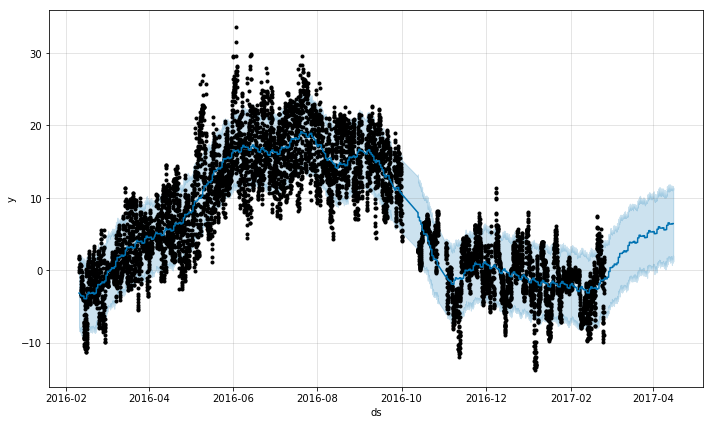

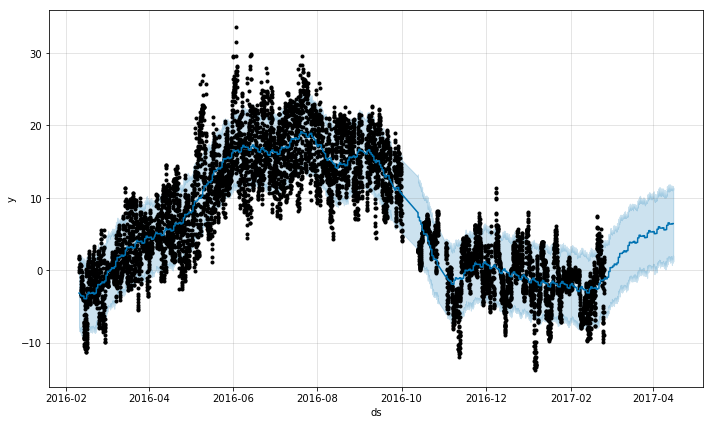

In [6]:
forecast = model.predict(future)
model.plot(forecast)

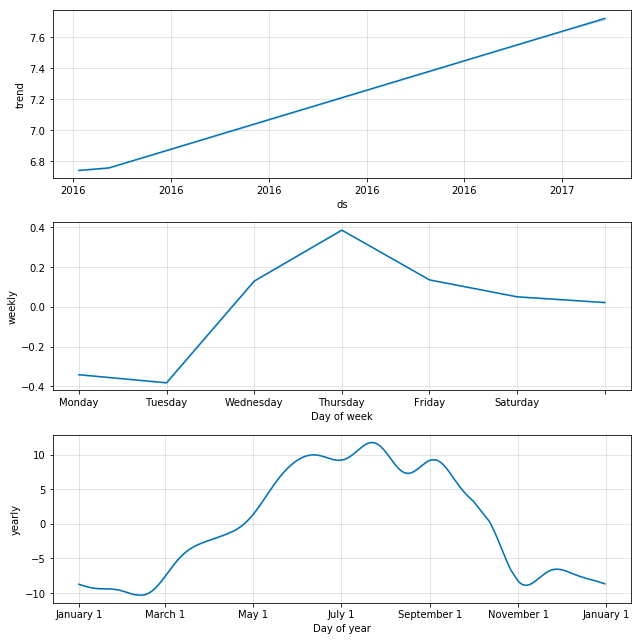

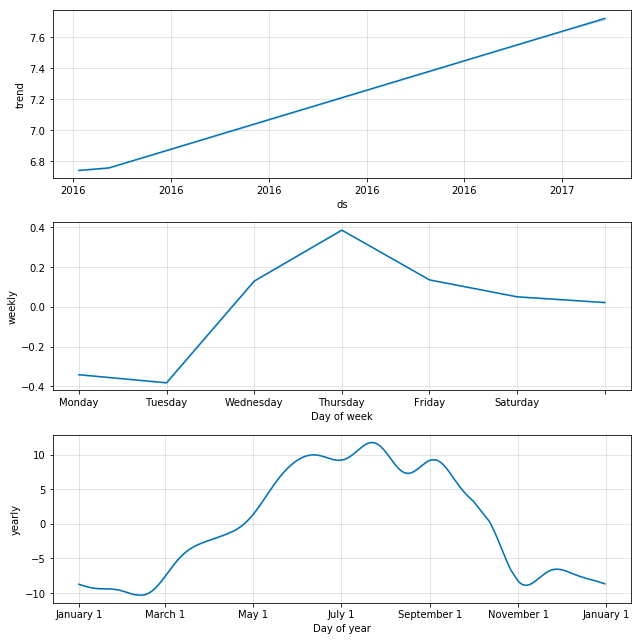

In [7]:
model.plot_components(forecast)

In [8]:
forecast.tail()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
9509,2017-04-15 15:00:00,1.131025,7.722200,-1.2737,-1.2737,7.716277,7.726870,1.327122,11.366856,0.021741,0.021741,0.021741,-1.295441,-1.295441,-1.295441,-1.2737,6.448500
9510,2017-04-15 16:00:00,1.131135,7.722299,-1.2737,-1.2737,7.716362,7.726977,1.507331,11.378423,0.021741,0.021741,0.021741,-1.295441,-1.295441,-1.295441,-1.2737,6.448600
9511,2017-04-15 17:00:00,1.131245,7.722399,-1.2737,-1.2737,7.716447,7.727084,2.027848,11.263582,0.021741,0.021741,0.021741,-1.295441,-1.295441,-1.295441,-1.2737,6.448699
9512,2017-04-15 18:00:00,1.131354,7.722498,-1.2737,-1.2737,7.716531,7.727191,1.614396,11.128103,0.021741,0.021741,0.021741,-1.295441,-1.295441,-1.295441,-1.2737,6.448798
9513,2017-04-15 19:00:00,1.131464,7.722597,-1.2737,-1.2737,7.716616,7.727298,1.224583,11.441638,0.021741,0.021741,0.021741,-1.295441,-1.295441,-1.295441,-1.2737,6.448898


In [9]:
recent = df[df.ds > '2017-01-01']
recent.head()

,ds,y
7813,2017-01-01T00:00:00Z,1.2
7814,2017-01-01T01:00:00Z,1.36
7815,2017-01-01T02:00:00Z,1.466666667
7816,2017-01-01T03:00:00Z,2.1
7817,2017-01-01T04:00:00Z,1.85


In [22]:
recent.shape

(1316, 2)

In [10]:
model_recent = Prophet()
model_recent.fit(recent)

In [11]:
future_recent = model_recent.make_future_dataframe(periods=24*10, freq='H')
forecast_recent = model_recent.predict(future_recent)

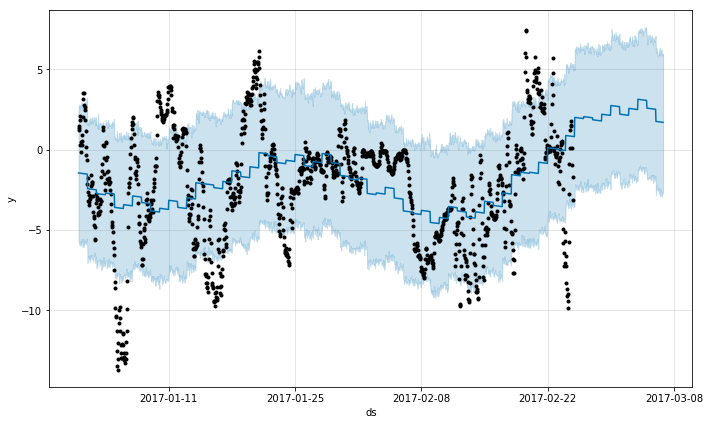

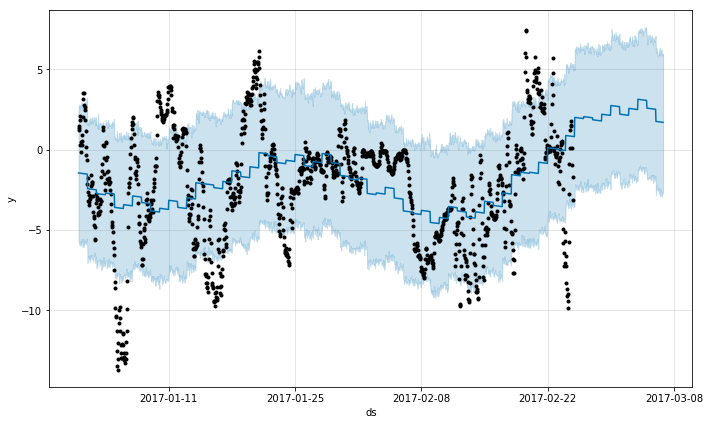

In [12]:
model_recent.plot(forecast_recent)

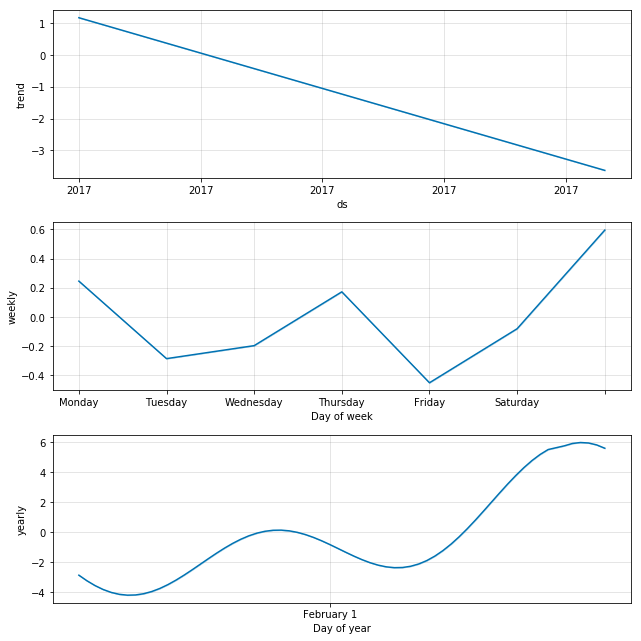

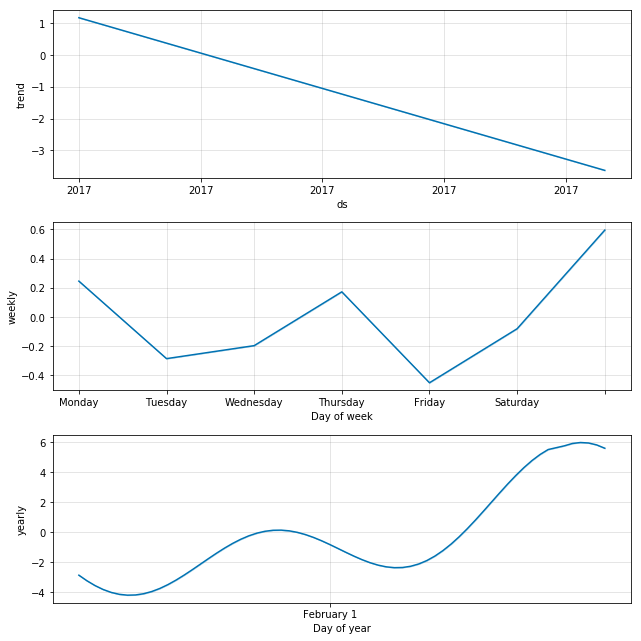

In [13]:
model_recent.plot_components(forecast_recent)

In [14]:
df2 = pd.read_csv('outdoor-temperature-12UTC.csv', na_values = 'DIFF', usecols = ['time', 'temperature'])
df2['ds'] = df2['time']
df2['y'] = df2['temperature']
df2 = df2.drop('time', axis=1)
df2 = df2.drop('temperature', axis=1)
df2.head()

,ds,y
0,2016-02-10T12:00:00Z,1.983333
1,2016-02-11T12:00:00Z,0.922222
2,2016-02-12T12:00:00Z,-0.260000
3,2016-02-13T12:00:00Z,-2.566667
4,2016-02-14T12:00:00Z,-4.300000


In [15]:
df2

,ds,y
0,2016-02-10T12:00:00Z,1.983333
1,2016-02-11T12:00:00Z,0.922222
2,2016-02-12T12:00:00Z,-0.260000
3,2016-02-13T12:00:00Z,-2.566667
4,2016-02-14T12:00:00Z,-4.300000
5,2016-02-15T12:00:00Z,-0.366667
6,2016-02-16T12:00:00Z,-2.866667
7,2016-02-17T12:00:00Z,2.250000
8,2016-02-18T12:00:00Z,-1.166667
9,2016-02-19T12:00:00Z,0.233333


In [16]:
#model2 = Prophet(mcmc_samples=500)
model2 = Prophet()
model2.fit(df2)

In [17]:
future2 = model2.make_future_dataframe(periods=50)
forecast2 = model2.predict(future2)

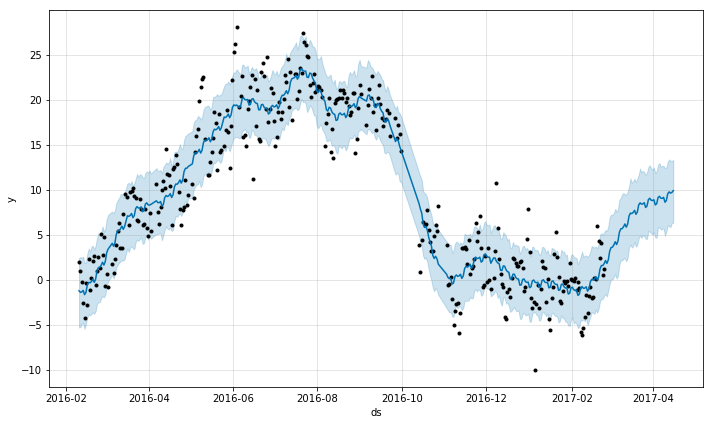

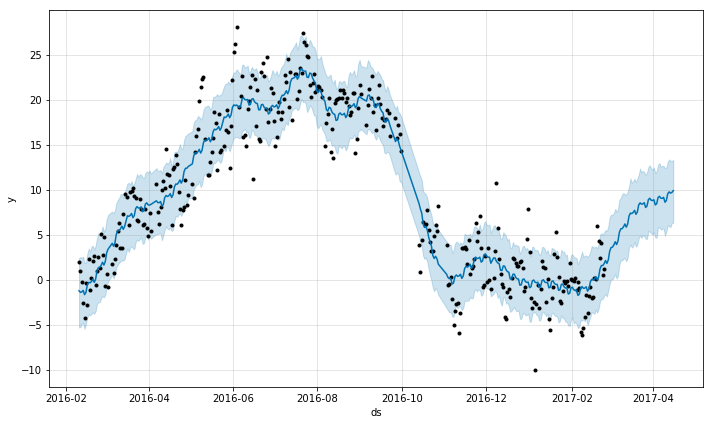

In [18]:
model2.plot(forecast2)

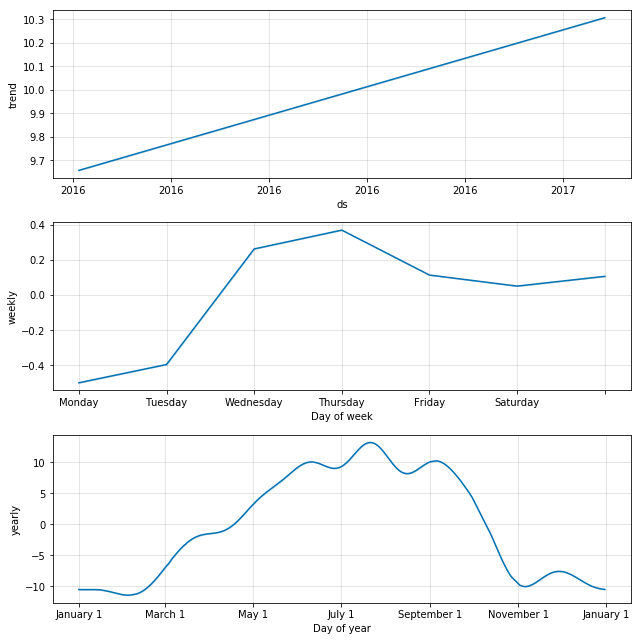

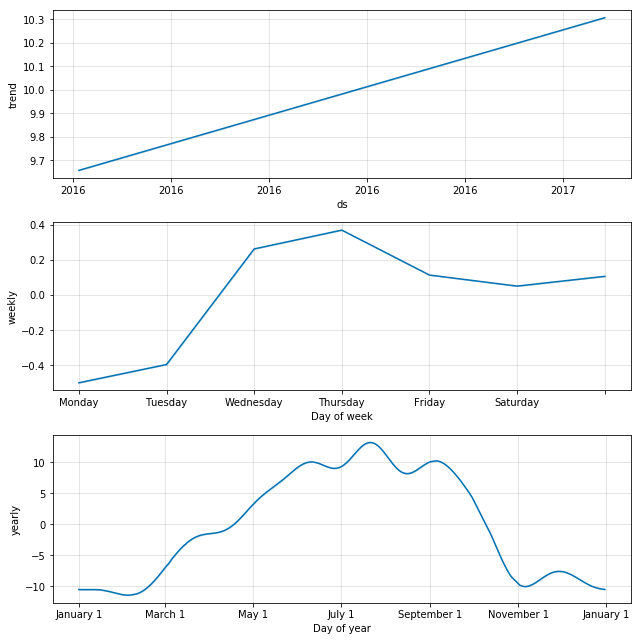

In [19]:
model2.plot_components(forecast2)

In [20]:
import datetime
f = forecast2[forecast2.ds > datetime.datetime.now()]
f.drop(['seasonal_lower', 'seasonal_upper', 'trend_lower', 'trend_upper', 'weekly_lower', 'weekly_upper', 'trend', 'seasonal', 'weekly'], axis=1)

,ds,t,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,yhat
346,2017-02-27 12:00:00,1.007895,-1.152124,5.931760,-7.638205,-7.638205,-7.638205,2.199381
347,2017-02-28 12:00:00,1.010526,-0.454200,6.960902,-7.342211,-7.342211,-7.342211,3.155253
348,2017-03-01 12:00:00,1.013158,0.039676,7.233820,-7.043498,-7.043498,-7.043498,3.562525
349,2017-03-02 12:00:00,1.015789,0.017200,7.157457,-6.743297,-6.743297,-6.743297,3.608214
350,2017-03-03 12:00:00,1.018421,0.297963,7.406287,-6.442839,-6.442839,-6.442839,3.847341
351,2017-03-04 12:00:00,1.021053,0.606180,7.853433,-6.143348,-6.143348,-6.143348,4.203924
352,2017-03-05 12:00:00,1.023684,0.106322,7.525922,-5.846038,-5.846038,-5.846038,3.896578
353,2017-03-06 12:00:00,1.026316,0.466584,7.859789,-5.552102,-5.552102,-5.552102,4.296036
354,2017-03-07 12:00:00,1.028947,1.676646,8.884490,-5.262715,-5.262715,-5.262715,5.245301
355,2017-03-08 12:00:00,1.031579,2.147969,9.049173,-4.979021,-4.979021,-4.979021,5.637553
